## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import chi2 ,mutual_info_classif
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,precision_score,accuracy_score,roc_curve, plot_confusion_matrix, precision_recall_curve,recall_score,f1_score
import category_encoders as ce       #instaled using pip install --upgrade category_encoders command
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.count import CountEncoder
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import shap

##  Import train and val data files from folder
(these files were created using Data Cleaning and Feature engineering)

In [7]:
train_Xy = pd.read_excel("file\\train_Xy.xlsx")
val_Xy = pd.read_excel("file\\val_Xy.xlsx")

test = pd.read_excel("file\\test_processed.xlsx")

In [4]:
train_Xy.shape
train_Xy['Claim'].value_counts(normalize = True)
val_Xy.shape
val_Xy['Claim'].value_counts(normalize = True)

train_Xy.drop(['Age_WO_Outliers_interval','Agency','Agency_Type',
                       'Distribution_Channel','Product_Name','Destination'],axis=1, 
              inplace =True)

val_Xy.drop(['Age_WO_Outliers_interval','Agency','Agency_Type',
                       'Distribution_Channel','Product_Name','Destination'],axis=1, 
              inplace =True)                             

#train_Xy.columns.tolist()

# Again separate out the train_y from train_Xy
train_X = train_Xy.iloc[ : , : -1]
train_y = train_Xy.iloc[ : , -1]
val_X = val_Xy.iloc[ : , : -1]
val_y = val_Xy.iloc[ : , -1]

## Making DataFrames having different categorical encoder strategies (OHE, target, Mean, count, WOE)

In [39]:
OHE =['Age_WO_Outliers',
 'Duration_WO_Outliers',
 'Net_Sales_WO_outliers',
 'Commision_WO_outliers',
 'perc_commision_WO_Outliers',
 'Duration_WO_Outliers_Sq',
 'Age_Duration_WO_Outliers',
 'perc_commision_WO_Outliers_Sq',
 'Agency_ADM',
 'Agency_ART',
 'Agency_C2B',
 'Agency_CBH',
 'Agency_CCR',
 'Agency_CSR',
 'Agency_CWT',
 'Agency_EPX',
 'Agency_JWT',
 'Agency_JZI',
 'Agency_KML',
 'Agency_LWC',
 'Agency_RAB',
 'Agency_SSI',
 'Agency_TST',
 'Agency_TTW',
 'Agency_Type_Airlines',
 'Agency_Type_Travel Agency',
 'Distribution_Channel_Offline',
 'Distribution_Channel_Online',
 'Product_Name_1 way Comprehensive Plan',
 'Product_Name_2 way Comprehensive Plan',
 'Product_Name_24 Protect',
 'Product_Name_Annual Gold Plan',
 'Product_Name_Annual Silver Plan',
 'Product_Name_Annual Travel Protect Gold',
 'Product_Name_Annual Travel Protect Platinum',
 'Product_Name_Annual Travel Protect Silver',
 'Product_Name_Basic Plan',
 'Product_Name_Bronze Plan',
 'Product_Name_Cancellation Plan',
 'Product_Name_Child Comprehensive Plan',
 'Product_Name_Comprehensive Plan',
 'Product_Name_Gold Plan',
 'Product_Name_Individual Comprehensive Plan',
 'Product_Name_Premier Plan',
 'Product_Name_Rental Vehicle Excess Insurance',
 'Product_Name_Silver Plan',
 'Product_Name_Single Trip Travel Protect Gold',
 'Product_Name_Single Trip Travel Protect Platinum',
 'Product_Name_Single Trip Travel Protect Silver',
 'Product_Name_Spouse or Parents Comprehensive Plan',
 'Product_Name_Ticket Protector',
 'Product_Name_Travel Cruise Protect',
 'Product_Name_Value Plan',
 'Destination_ARGENTINA',
 'Destination_AUSTRALIA',
 'Destination_AUSTRIA',
 'Destination_AZERBAIJAN',
 'Destination_BAHRAIN',
 'Destination_BANGLADESH',
 'Destination_BELARUS',
 'Destination_BELGIUM',
 'Destination_BERMUDA',
 'Destination_BHUTAN',
 'Destination_BOLIVIA',
 'Destination_BRAZIL',
 'Destination_BRUNEI DARUSSALAM',
 'Destination_CAMBODIA',
 'Destination_CANADA',
 'Destination_CHILE',
 'Destination_CHINA',
 'Destination_COLOMBIA',
 'Destination_COSTA RICA',
 'Destination_CROATIA',
 'Destination_CYPRUS',
 'Destination_CZECH REPUBLIC',
 'Destination_DENMARK',
 'Destination_EGYPT',
 'Destination_ESTONIA',
 'Destination_ETHIOPIA',
 'Destination_FIJI',
 'Destination_FINLAND',
 'Destination_FRANCE',
 'Destination_GEORGIA',
 'Destination_GERMANY',
 'Destination_GREECE',
 'Destination_GUAM',
 'Destination_HONG KONG',
 'Destination_HUNGARY',
 'Destination_ICELAND',
 'Destination_INDIA',
 'Destination_INDONESIA',
 'Destination_IRELAND',
 'Destination_ISRAEL',
 'Destination_ITALY',
 'Destination_JAPAN',
 'Destination_JORDAN',
 'Destination_KAZAKHSTAN',
 'Destination_KENYA',
 'Destination_KOREA, REPUBLIC OF',
 'Destination_KUWAIT',
 'Destination_KYRGYZSTAN',
 "Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC",
 'Destination_LEBANON',
 'Destination_LITHUANIA',
 'Destination_LUXEMBOURG',
 'Destination_MACAO',
 'Destination_MALAYSIA',
 'Destination_MALDIVES',
 'Destination_MALTA',
 'Destination_MAURITIUS',
 'Destination_MEXICO',
 'Destination_MONGOLIA',
 'Destination_MOROCCO',
 'Destination_MYANMAR',
 'Destination_NEPAL',
 'Destination_NETHERLANDS',
 'Destination_NEW ZEALAND',
 'Destination_NORWAY',
 'Destination_OMAN',
 'Destination_PAKISTAN',
 'Destination_PERU',
 'Destination_PHILIPPINES',
 'Destination_POLAND',
 'Destination_PORTUGAL',
 'Destination_QATAR',
 'Destination_ROMANIA',
 'Destination_RUSSIAN FEDERATION',
 'Destination_SAUDI ARABIA',
 'Destination_SINGAPORE',
 'Destination_SLOVENIA',
 'Destination_SOUTH AFRICA',
 'Destination_SPAIN',
 'Destination_SRI LANKA',
 'Destination_SWEDEN',
 'Destination_SWITZERLAND',
 'Destination_TAIWAN, PROVINCE OF CHINA',
 'Destination_TANZANIA, UNITED REPUBLIC OF',
 'Destination_THAILAND',
 'Destination_TUNISIA',
 'Destination_TURKEY',
 'Destination_TURKMENISTAN',
 'Destination_UKRAINE',
 'Destination_UNITED ARAB EMIRATES',
 'Destination_UNITED KINGDOM',
 'Destination_UNITED STATES',
 'Destination_UZBEKISTAN',
 'Destination_VANUATU',
 'Destination_VENEZUELA',
 'Destination_VIET NAM',
 'Destination_ZAMBIA']

tar = ['Age_WO_Outliers',
 'Duration_WO_Outliers',
 'Net_Sales_WO_outliers',
 'Commision_WO_outliers',
 'perc_commision_WO_Outliers',
 'Duration_WO_Outliers_Sq',
 'Age_Duration_WO_Outliers',
 'perc_commision_WO_Outliers_Sq','Product_Name_Targetenc',
 'Agency_Type_Targetenc',
 'Distribution_Channel_Targetenc',
 'Agency_Targetenc',
 'Destination_Targetenc']

count=['Age_WO_Outliers',
 'Duration_WO_Outliers',
 'Net_Sales_WO_outliers',
 'Commision_WO_outliers',
 'perc_commision_WO_Outliers',
 'Duration_WO_Outliers_Sq',
 'Age_Duration_WO_Outliers',
 'perc_commision_WO_Outliers_Sq','Product_Name_Countenc',
 'Agency_Type_Countenc',
 'Distribution_Channel_Countenc',
 'Agency_Countenc',
 'Destination_Countenc']

WOE = ['Age_WO_Outliers',
 'Duration_WO_Outliers',
 'Net_Sales_WO_outliers',
 'Commision_WO_outliers',
 'perc_commision_WO_Outliers',
 'Duration_WO_Outliers_Sq',
 'Age_Duration_WO_Outliers',
 'perc_commision_WO_Outliers_Sq','Product_Name_WOEenc',
 'Agency_Type_WOEenc',
 'Distribution_Channel_WOEenc',
 'Agency_WOEenc',
 'Destination_WOEenc']


mean_tar =['Age_WO_Outliers',
 'Duration_WO_Outliers',
 'Net_Sales_WO_outliers',
 'Commision_WO_outliers',
 'perc_commision_WO_Outliers',
 'Duration_WO_Outliers_Sq',
 'Age_Duration_WO_Outliers',
 'perc_commision_WO_Outliers_Sq','Product_Name_mean_target',
 'Agency_Type_mean_target',
 'Distribution_Channel_mean_target',
 'Agency_mean_target',
 'Destination_mean_target']

train_X_OHE = train_X[OHE]
train_X_tar = train_X[tar]
train_X_count = train_X[count]
train_X_WOE = train_X[WOE]
train_X_mean_tar = train_X[mean_tar]

val_X_OHE = val_X[OHE]
val_X_tar = val_X[tar]
val_X_count = val_X[count]
val_X_WOE = val_X[WOE]
val_X_mean_tar = val_X[mean_tar]

## xgboost Hyperparameter tuning

In [79]:
param_grid = {'max_depth':[3,5,7,8,9],'learning_rate':[0.01,0.05,0.1,0.3,0.5] , 
              'reg_lambda':[0,1.0,5.0],'n_estimators': [100]
              }

fit_params={"early_stopping_rounds": 50, "eval_metric": 'aucpr', "eval_set" : [(val_X_OHE, val_y)]}
            
    

In [80]:
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic'), n_jobs= 5 ,
                              param_grid=param_grid ,verbose = True,
                              cv = StratifiedKFold(n_splits=3,random_state=None,shuffle=False))

optimal_params.fit(train_X_OHE,train_y,**fit_params)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[0]	validation_0-aucpr:0.70940
[1]	validation_0-aucpr:0.74626
[2]	validation_0-aucpr:0.77057
[3]	validation_0-aucpr:0.78742
[4]	validation_0-aucpr:0.79660
[5]	validation_0-aucpr:0.80195
[6]	validation_0-aucpr:0.81004
[7]	validation_0-aucpr:0.82088
[8]	validation_0-aucpr:0.82701
[9]	validation_0-aucpr:0.83884
[10]	validation_0-aucpr:0.83978
[11]	validation_0-aucpr:0.83966
[12]	validation_0-aucpr:0.84401
[13]	validation_0-aucpr:0.84692
[14]	validation_0-aucpr:0.84891
[15]	validation_0-aucpr:0.85701
[16]	validation_0-aucpr:0.86269
[17]	validation_0-aucpr:0.86283
[18]	validation_0-aucpr:0.86384
[19]	validation_0-aucpr:0.86420
[20]	validation_0-aucpr:0.86409
[21]	validation_0-aucpr:0.86735
[22]	validation_0-aucpr:0.86991
[23]	validation_0-aucpr:0.87007
[24]	validation_0-aucpr:0.87241
[25]	validation_0-aucpr:0.87569
[26]	validation_0-aucpr:0.88490
[27]	validation_0-aucpr:0.88727
[28]	validation_0-aucpr:0.89095
[29]	validation_0-au

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     mis...nts=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                  

In [81]:
optimal_params.best_params_

{'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 100, 'reg_lambda': 1.0}

In [82]:
optimal_params.best_score_

0.941456941726829

## Xgboost built using OHE categorical encoding strategy ( this is the best model of all)

validation: precision_score =  0.833
validation: recall_score =  0.916
validation: accuracy_score =  0.955
validation: f1_score =  0.873
train: precision_score =  0.912
train: recall_score =  0.999
train: accuracy_score =  0.984
train: f1_score =  0.954
validation@threshold0.80: precision_score =  0.92
validation@threshold0.80: recall_score =  0.84
validation@threshold0.80: accuracy_score =  0.96
validation@threshold0.80: f1_score =  0.88


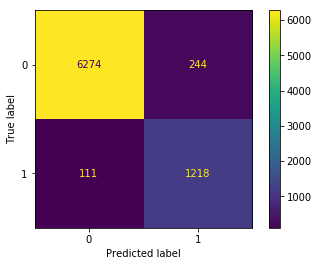

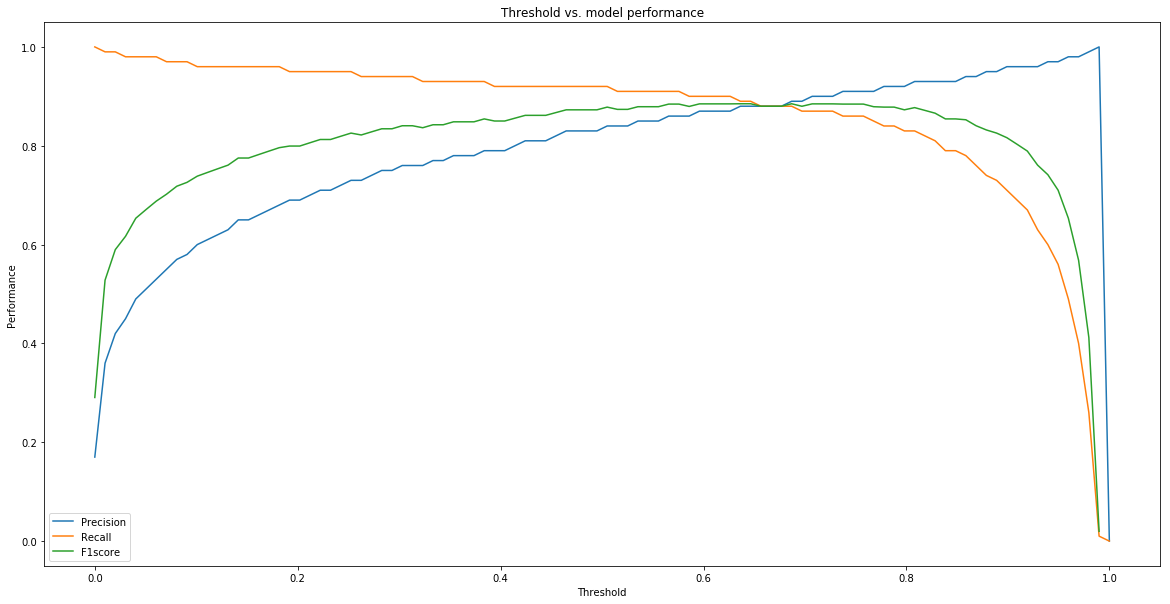

In [40]:
clf_xgb = xgb.XGBClassifier(objective= 'binary:logistic',gamma= 0,
                             learning_rate= 0.3,
                             max_depth= 9,
                             n_estimators= 1000,
                             reg_lambda= 1,
                             scale_pos_weight= 5, seed=2020)
clf_xgb.fit(train_X_OHE,train_y,verbose = False, early_stopping_rounds = 10,eval_metric='aucpr',eval_set =[(val_X_OHE,val_y)])

# Build confusion matrix on validation dataset
plot_confusion_matrix(clf_xgb,val_X_OHE,val_y, values_format= 'd')

#Prediction on validation dataset
#Check different metrics on validation dataset
val_y_pred = clf_xgb.predict(val_X_OHE)
val_y_pred_prob = clf_xgb.predict_proba(val_X_OHE)[: ,1]
print("validation: precision_score = " , precision_score(val_y,val_y_pred).round(3))
print("validation: recall_score = " ,    recall_score(val_y,val_y_pred).round(3))
print("validation: accuracy_score = " , accuracy_score(val_y,val_y_pred).round(3))
print("validation: f1_score = " , f1_score(val_y,val_y_pred).round(3))

#Prediction on train dataset
#Check different metrics on train dataset
train_y_pred = clf_xgb.predict(train_X_OHE)
train_y_pred_prob = clf_xgb.predict_proba(train_X_OHE)[: ,1]
print("train: precision_score = " ,precision_score(train_y,train_y_pred).round(3))
print("train: recall_score = " , recall_score(train_y,train_y_pred).round(3))
print("train: accuracy_score = " , accuracy_score(train_y,train_y_pred).round(3))
print("train: f1_score = " , f1_score(train_y,train_y_pred).round(3))


#Check different metrics on validation dataset with threshold = 0.80
print("validation@threshold0.80: precision_score = ", precision_score(val_y, val_y_pred_prob > 0.80).round(2))
print("validation@threshold0.80: recall_score = ", recall_score(val_y, val_y_pred_prob > 0.80).round(2))
print("validation@threshold0.80: accuracy_score = ", accuracy_score(val_y, val_y_pred_prob > 0.80).round(2))
print("validation@threshold0.80: f1_score = ", f1_score(val_y, val_y_pred_prob > 0.80).round(2))

# Threshold vs.precision, recall,F1score Plot on validation dataset     
precision = []
recall = []
F1score = []
for i in np.linspace(0,1.01,100):
    precision_ = precision_score(val_y, val_y_pred_prob > i).round(2)
    recall_    = recall_score(val_y, val_y_pred_prob > i).round(2)    
    F1score_ = 2*(precision_*recall_)/(precision_ + recall_)
    precision.append(precision_)
    recall.append(recall_)
    F1score.append(F1score_)

    
threshold = list(np.linspace(0,1,100))
plt.figure(figsize=(20,10))
plt.plot(threshold, precision, label='Precision')
plt.plot(threshold, recall, label='Recall')
plt.plot(threshold, F1score, label='F1score')
plt.xlabel("Threshold")
plt.ylabel("Performance")
plt.title("Threshold vs. model performance")
plt.legend() 

### Threshold vs.precision, recall,F1score Plot on train dataset    

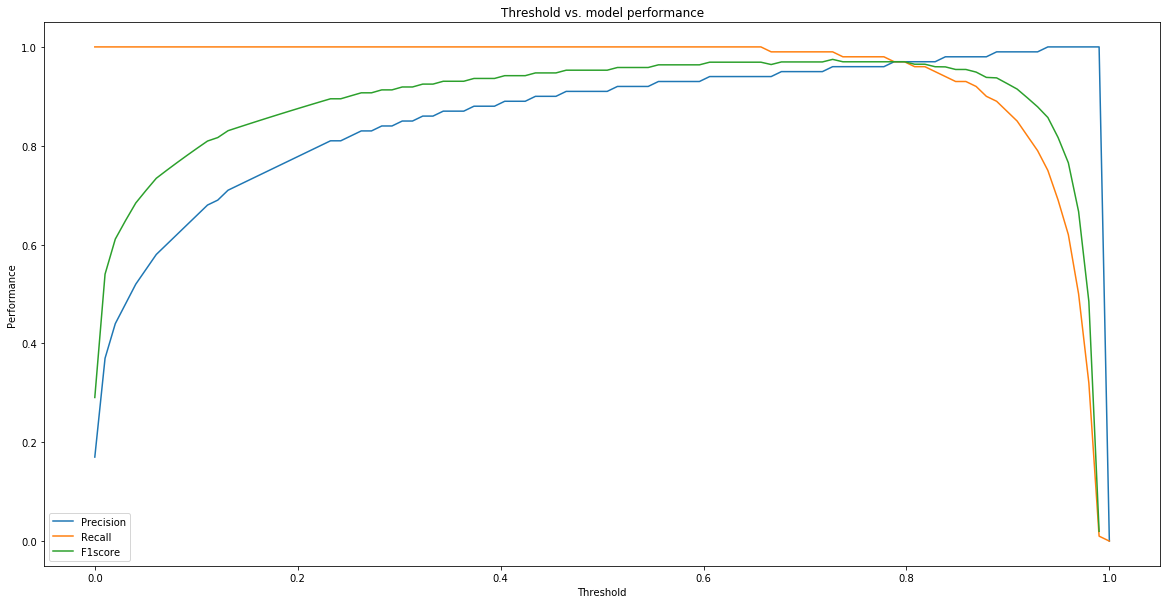

In [83]:
precision = []
recall = []
F1score = []
for i in np.linspace(0,1.01,100):
    precision_ = precision_score(train_y, train_y_pred_prob > i).round(2)
    recall_    = recall_score(train_y, train_y_pred_prob > i).round(2)    
    F1score_ = 2*(precision_*recall_)/(precision_ + recall_)
    precision.append(precision_)
    recall.append(recall_)
    F1score.append(F1score_)

    
threshold = list(np.linspace(0,1,100))
plt.figure(figsize=(20,10))
plt.plot(threshold, precision, label='Precision')
plt.plot(threshold, recall, label='Recall')
plt.plot(threshold, F1score, label='F1score')
plt.xlabel("Threshold")
plt.ylabel("Performance")
plt.title("Threshold vs. model performance")
plt.legend() 

## Check different metrics on train dataset with threshold = 0.80

In [84]:
print("train@threshold0.80: precision_score = ", precision_score(train_y, train_y_pred_prob > 0.80).round(2))
print("train@threshold0.80: recall_score = ", recall_score(train_y, train_y_pred_prob > 0.80).round(2))
print("train@threshold0.80: accuracy_score = ", accuracy_score(train_y, train_y_pred_prob > 0.80).round(2))
print("train@threshold0.80: f1_score = ", f1_score(train_y, train_y_pred_prob > 0.80).round(2))


train@threshold0.80: precision_score =  0.97
train@threshold0.80: recall_score =  0.97
train@threshold0.80: accuracy_score =  0.99
train@threshold0.80: f1_score =  0.97


## On validation dataset create pred_labels for threshold = 0.80

In [53]:
val_y_pred_80 = np.where(val_y_pred_prob > 0.80, 1 , 0) 
val_y_pred_80
print("validation@threshold0.80: precision_score = " , precision_score(val_y,val_y_pred_80).round(2))
print("validation@threshold0.80: recall_score = " ,    recall_score(val_y,val_y_pred_80).round(2))
print("validation@threshold0.80: accuracy_score = " , accuracy_score(val_y,val_y_pred_80).round(2))
print("validation@threshold0.80: f1_score = " , f1_score(val_y,val_y_pred_80).round(2))

validation@threshold0.80: precision_score =  0.92
validation@threshold0.80: recall_score =  0.84
validation@threshold0.80: accuracy_score =  0.96
validation@threshold0.80: f1_score =  0.88


## Feature Importance using SHAP

## Top 20 Features

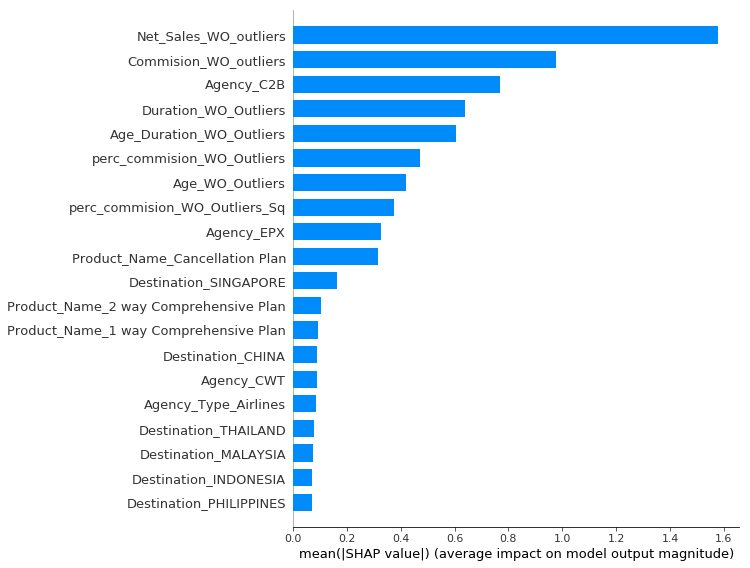

In [13]:
shap_values = shap.TreeExplainer(clf_xgb).shap_values(train_X_OHE)
shap.summary_plot(shap_values, train_X_OHE, plot_type="bar")

## Summary Plots for feature interpretability

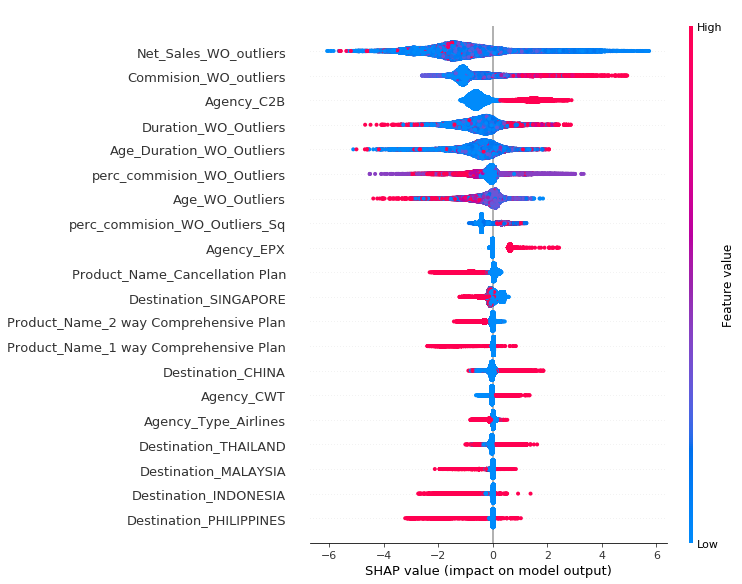

NoneType

In [50]:
shap.summary_plot(shap_values, train_X_OHE)

## Creating a DataFarme Features vs. avg.SHAPvalue

In [71]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([train_X_OHE.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df.sort_values('shap_importance', inplace= True)

#importance_df.tail(40).plot(kind = 'barh', y = 'shap_importance' , x = 'column_name', figsize = (20,30) )

## DataFrame to Combine SHAPvalues and Feature Values

In [90]:
train_X_OHE_col_list = train_X_OHE.columns.to_list()
append_str = '_SHAP'
suf_res = [sub + append_str for sub in train_X_OHE_col_list] 
shap_values_df = pd.DataFrame(shap_values)
shap_values_df.columns = suf_res
shap_values_df_impfeat = shap_values_df[['Net_Sales_WO_outliers_SHAP','Commision_WO_outliers_SHAP','Agency_C2B_SHAP','Duration_WO_Outliers_SHAP',
                                         'Age_Duration_WO_Outliers_SHAP','perc_commision_WO_Outliers_SHAP','Age_WO_Outliers_SHAP',
                                         'perc_commision_WO_Outliers_Sq_SHAP','Agency_EPX_SHAP','Product_Name_Cancellation Plan_SHAP',
                                         'Destination_SINGAPORE_SHAP','Product_Name_2 way Comprehensive Plan_SHAP',
                                         'Product_Name_1 way Comprehensive Plan_SHAP','Destination_CHINA_SHAP','Agency_CWT_SHAP',
                                         'Agency_Type_Airlines_SHAP','Destination_THAILAND_SHAP','Destination_MALAYSIA_SHAP',
                                         'Destination_INDONESIA_SHAP','Destination_PHILIPPINES_SHAP']]

train_X_OHE_impfeat = train_X_OHE[['Net_Sales_WO_outliers','Commision_WO_outliers','Agency_C2B','Duration_WO_Outliers',
                                   'Age_Duration_WO_Outliers','perc_commision_WO_Outliers','Age_WO_Outliers',
                                   'perc_commision_WO_Outliers_Sq','Agency_EPX','Product_Name_Cancellation Plan',
                                   'Destination_SINGAPORE','Product_Name_2 way Comprehensive Plan',
                                   'Product_Name_1 way Comprehensive Plan','Destination_CHINA','Agency_CWT',
                                   'Agency_Type_Airlines','Destination_THAILAND','Destination_MALAYSIA','Destination_INDONESIA',
                                   'Destination_PHILIPPINES']]

Feat_shap_df = pd.concat([shap_values_df_impfeat,train_X_OHE_impfeat], axis =1 )

## Scatter Plots: Features values vs. SHAP values

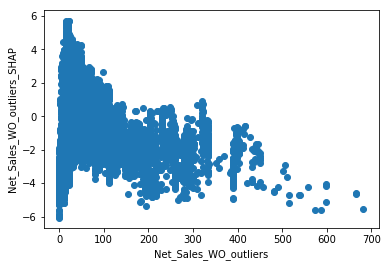

In [107]:
#plt.figure(figsize= (15,8))
plt.scatter( x = Feat_shap_df['Net_Sales_WO_outliers'], y = Feat_shap_df['Net_Sales_WO_outliers_SHAP'])
plt.xlabel('Net_Sales_WO_outliers')
plt.ylabel('Net_Sales_WO_outliers_SHAP')
plt.show()

Text(0,0.5,'Duration_WO_Outliers_SHAP')

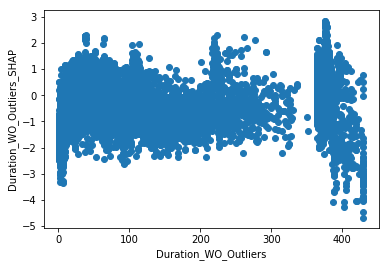

In [106]:

plt.scatter( x = Feat_shap_df['Duration_WO_Outliers'], y = Feat_shap_df['Duration_WO_Outliers_SHAP'])
plt.xlabel('Duration_WO_Outliers')
plt.ylabel('Duration_WO_Outliers_SHAP')

Text(0,0.5,'Age_WO_Outliers_SHAP')

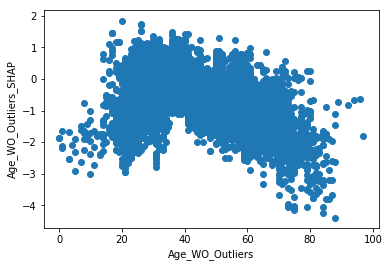

In [109]:
plt.scatter( x = Feat_shap_df['Age_WO_Outliers'], y = Feat_shap_df['Age_WO_Outliers_SHAP'])
plt.xlabel('Age_WO_Outliers')
plt.ylabel('Age_WO_Outliers_SHAP')

Text(0,0.5,'Product_Name_Cancellation Plan_SHAP')

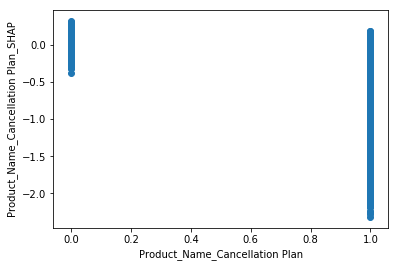

In [97]:
plt.scatter( x = Feat_shap_df['Product_Name_Cancellation Plan'], y = Feat_shap_df['Product_Name_Cancellation Plan_SHAP'])
plt.xlabel('Product_Name_Cancellation Plan')
plt.ylabel('Product_Name_Cancellation Plan_SHAP')

Text(0,0.5,'Destination_SINGAPORE_SHAP')

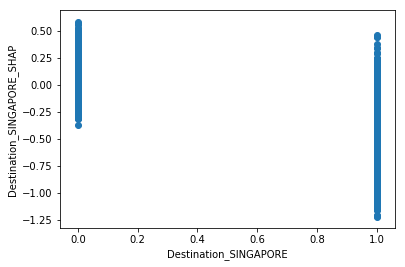

In [110]:
plt.scatter( x = Feat_shap_df['Destination_SINGAPORE'], y = Feat_shap_df['Destination_SINGAPORE_SHAP'])
plt.xlabel('Destination_SINGAPORE')
plt.ylabel('Destination_SINGAPORE_SHAP')

Text(0,0.5,'Product_Name_2 way Comprehensive Plan_SHAP')

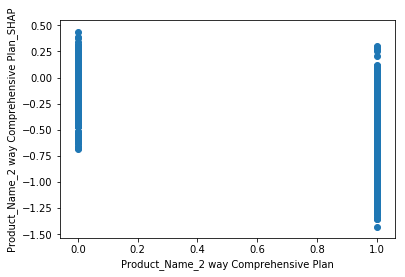

In [111]:
plt.scatter( x = Feat_shap_df['Product_Name_2 way Comprehensive Plan'], y = Feat_shap_df['Product_Name_2 way Comprehensive Plan_SHAP'])
plt.xlabel('Product_Name_2 way Comprehensive Plan')
plt.ylabel('Product_Name_2 way Comprehensive Plan_SHAP')

Text(0,0.5,'Product_Name_1 way Comprehensive Plan_SHAP')

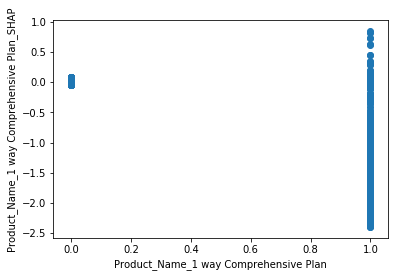

In [112]:
plt.scatter( x = Feat_shap_df['Product_Name_1 way Comprehensive Plan'], y = Feat_shap_df['Product_Name_1 way Comprehensive Plan_SHAP'])
plt.xlabel('Product_Name_1 way Comprehensive Plan')
plt.ylabel('Product_Name_1 way Comprehensive Plan_SHAP')

Text(0,0.5,'Destination_CHINA_SHAP')

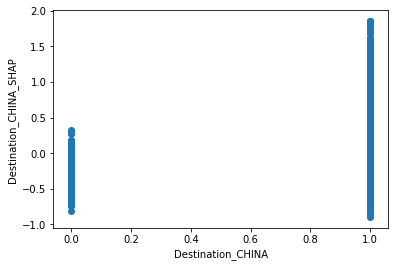

In [113]:
plt.scatter( x = Feat_shap_df['Destination_CHINA'], y = Feat_shap_df['Destination_CHINA_SHAP'])
plt.xlabel('Destination_CHINA')
plt.ylabel('Destination_CHINA_SHAP')

Text(0,0.5,'Destination_THAILAND_SHAP')

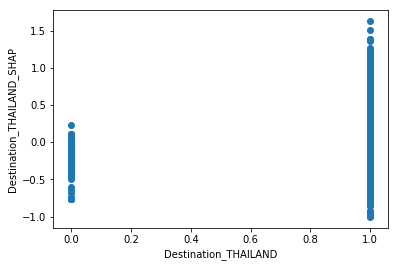

In [114]:
plt.scatter( x = Feat_shap_df['Destination_THAILAND'], y = Feat_shap_df['Destination_THAILAND_SHAP'])
plt.xlabel('Destination_THAILAND')
plt.ylabel('Destination_THAILAND_SHAP')

Text(0,0.5,'Destination_MALAYSIA_SHAP')

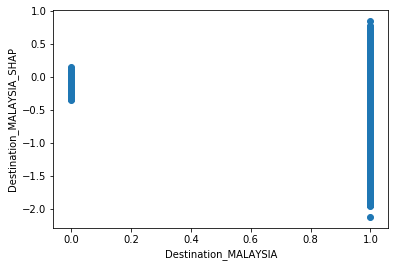

In [115]:
plt.scatter( x = Feat_shap_df['Destination_MALAYSIA'], y = Feat_shap_df['Destination_MALAYSIA_SHAP'])
plt.xlabel('Destination_MALAYSIA')
plt.ylabel('Destination_MALAYSIA_SHAP')

Text(0,0.5,'Destination_INDONESIA_SHAP')

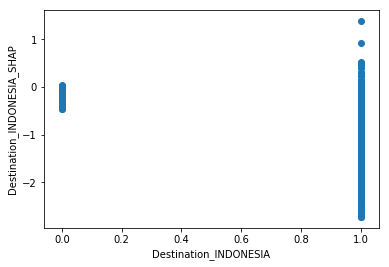

In [116]:
plt.scatter( x = Feat_shap_df['Destination_INDONESIA'], y = Feat_shap_df['Destination_INDONESIA_SHAP'])
plt.xlabel('Destination_INDONESIA')
plt.ylabel('Destination_INDONESIA_SHAP')

Text(0,0.5,'Destination_PHILIPPINES_SHAP')

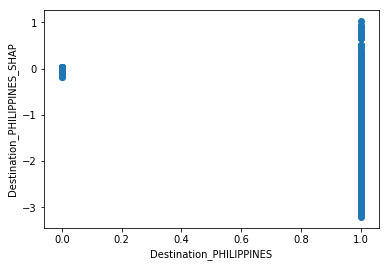

In [117]:
plt.scatter( x = Feat_shap_df['Destination_PHILIPPINES'], y = Feat_shap_df['Destination_PHILIPPINES_SHAP'])
plt.xlabel('Destination_PHILIPPINES')
plt.ylabel('Destination_PHILIPPINES_SHAP')

## Predict on test data

In [1]:
test_OHE = test[OHE]
test_OHE

## Predict on Test data with threshold =0.5

In [75]:
test_y_pred_50 = clf_xgb.predict(test_OHE)
test_y_pred_prob = clf_xgb.predict_proba(test_OHE)[: ,1]

## Get Test data labels with threshold =0.8

In [2]:
test_y_pred_80 = np.where(test_y_pred_prob > 0.80, 1 , 0) 


## Create final submission file

In [77]:
test_y_pred_80_df = pd.DataFrame(test_y_pred_80)
test_y_pred_80_df.columns = ['Claim']

Submission =  pd.concat([test_[['ID']],test_y_pred_80_df], axis = 1) 
Submission.to_csv("file\\Submission.csv")

## End of Xgboost model